In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pandas as pd
from scipy.io import wavfile
import tensorflow as tf

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
def timestamp():
    return datetime.today()
    #return datetime.today().strftime('%m/%d/%Y %H:%M:%S')

In [3]:
def soundToDataFrame(soundFile,targetValue):

    startTime = timestamp()
    #print(startTime)
    
    wav_file_name = soundFile
    
    # analyze audio data
    sample_rate, wav_data = wavfile.read(wav_file_name, 'rb')
    
    # Show some basic information about the audio.
    duration = len(wav_data)/sample_rate
    print(f'Sample rate: {sample_rate} Hz')
    print(f'Total duration: {duration:.2f}s')
    print(f'Size of the input: {len(wav_data)}')
    
    waveform = wav_data / tf.int16.max
    
    xlower = 0
    xupper = len(wav_data)
    
    plt.figure(figsize=(15, 40))
    
    # Plot the waveform.
    plt.subplot(3, 1, 1)
    plt.plot(waveform)
    #plt.xlim([0, len(waveform)])
    plt.xlim([xlower,xupper])
    #plt.yticks(np.arange(0, 0.5, step=0.03))
    plt.grid(axis='y')
    
    print(waveform.shape)
    
    #print(waveform[0])
    #print(waveform[0][0])
    #print(waveform[0][1])
    
    cutOffNo = 5000
    temp_waveform = []
    df_temp2 = pd.DataFrame()
    i2 = 0
    for i in range(len(waveform)):
        temp_waveform.append(waveform[i][0])
        temp_waveform.append(waveform[i][1])
        i2 += 1
        if i2 == cutOffNo:
            df_temp = pd.DataFrame(temp_waveform)
            df_temp = df_temp.T
            df_temp2 = df_temp2.append(df_temp)
            i2 = 0
            temp_waveform = []
            
    del waveform
    del temp_waveform
    #del temp_df
    #del temp2_df
    #print(temp3_df)
    endTime = timestamp()

    print("Start Time:",startTime)
    print("End Time:",endTime)
    print("Total time:", endTime - startTime)

    return df_temp2

Sample rate: 44100 Hz
Total duration: 146.85s
Size of the input: 6476107
(6476107, 2)
Start Time: 2021-11-15 12:12:53.102764
End Time: 2021-11-15 12:14:09.493889
Total time: 0:01:16.391125


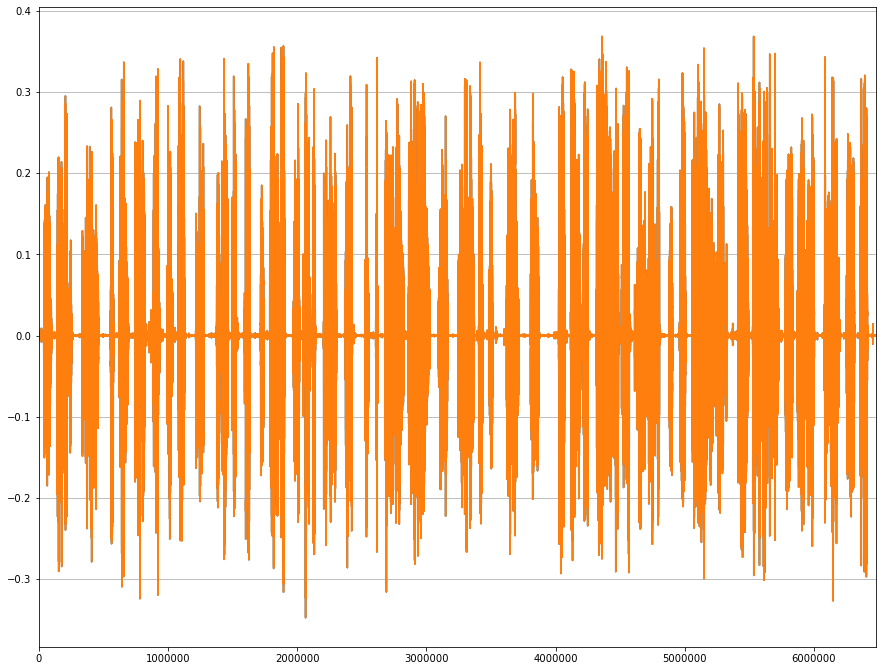

In [4]:
df3 = pd.DataFrame()
df3 = df3.append(soundToDataFrame("tom001.wav","Tom"))
df3 = df3.reset_index(drop=True)

In [6]:
df3[10000] = "Tom"

In [7]:
df3

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,-0.000488,-0.000488,-0.000549,-0.000549,-0.000488,-0.000488,-0.000458,-0.000458,-0.000366,-0.000366,...,-0.001740,-0.001740,-0.001740,-0.001923,-0.001923,-0.001953,-0.001953,-0.002075,-0.002075,Tom
1,-0.002197,-0.002197,-0.002258,-0.002258,-0.002350,-0.002350,-0.002319,-0.002319,-0.002472,-0.002472,...,0.001556,0.001526,0.001526,0.001404,0.001404,0.001312,0.001312,0.001160,0.001160,Tom
2,0.000946,0.000946,0.000916,0.000916,0.000855,0.000855,0.000885,0.000885,0.001160,0.001160,...,-0.003052,-0.003204,-0.003204,-0.003265,-0.003265,-0.003418,-0.003418,-0.003418,-0.003418,Tom
3,-0.003479,-0.003479,-0.003449,-0.003449,-0.003235,-0.003235,-0.003052,-0.003052,-0.002625,-0.002625,...,0.000855,0.000763,0.000763,0.000702,0.000702,0.000549,0.000549,0.000397,0.000397,Tom
4,0.000366,0.000366,0.000183,0.000183,0.000183,0.000183,-0.000031,-0.000031,-0.000122,-0.000122,...,0.000549,0.000519,0.000519,0.000336,0.000336,0.000305,0.000305,0.000092,0.000092,Tom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.000458,0.000458,0.000397,0.000397,0.000458,0.000458,0.000458,0.000458,0.000427,0.000427,...,0.001343,0.001221,0.001221,0.001221,0.001221,0.001190,0.001190,0.001221,0.001221,Tom
1291,0.001221,0.001221,0.001282,0.001282,0.001282,0.001282,0.001404,0.001404,0.001495,0.001495,...,0.000336,0.000336,0.000336,0.000275,0.000275,0.000336,0.000336,0.000244,0.000244,Tom
1292,0.000244,0.000244,0.000244,0.000244,0.000183,0.000183,0.000244,0.000244,0.000183,0.000183,...,0.000000,-0.000031,-0.000031,0.000031,0.000031,0.000000,0.000000,-0.000031,-0.000031,Tom
1293,0.000061,0.000061,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,0.000000,0.000000,...,0.000031,-0.000031,-0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,Tom


Sample rate: 44100 Hz
Total duration: 101.58s
Size of the input: 4479696
(4479696, 2)
Start Time: 2021-11-15 12:14:16.757727
End Time: 2021-11-15 12:15:02.044840
Total time: 0:00:45.287113


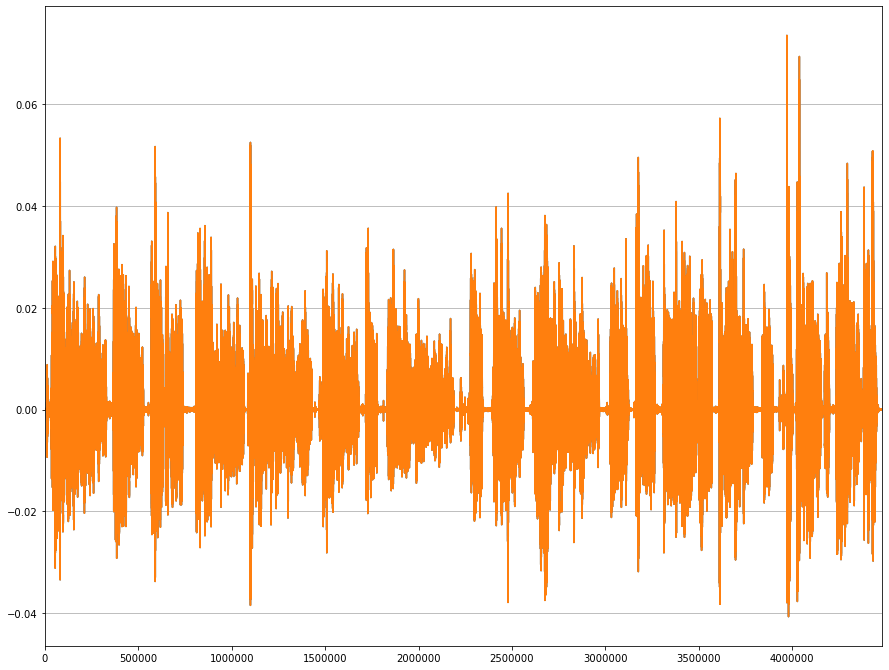

In [8]:
df2 = pd.DataFrame()
df2 = df2.append(soundToDataFrame("you007.wav","You"))
df2 = df2.reset_index(drop=True)
df2[10000] = "You"

In [9]:
df2

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.000000,0.000000,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,...,0.000000,-0.000031,-0.000031,-0.000061,-0.000061,0.000031,0.000031,-0.000061,-0.000061,You
1,-0.000031,-0.000031,0.000031,0.000031,-0.000092,-0.000092,0.000061,0.000061,-0.000031,-0.000031,...,-0.003693,-0.003571,-0.003571,-0.003510,-0.003510,-0.003479,-0.003479,-0.003418,-0.003418,You
2,-0.003479,-0.003479,-0.003418,-0.003418,-0.003510,-0.003510,-0.003571,-0.003571,-0.003571,-0.003571,...,0.002625,0.002625,0.002625,0.002747,0.002747,0.002777,0.002777,0.002838,0.002838,You
3,0.002960,0.002960,0.002930,0.002930,0.003052,0.003052,0.003052,0.003052,0.003082,0.003082,...,0.000244,0.000183,0.000183,0.000153,0.000153,0.000183,0.000183,0.000122,0.000122,You
4,0.000244,0.000244,0.000244,0.000244,0.000275,0.000275,0.000397,0.000397,0.000305,0.000305,...,-0.000122,-0.000244,-0.000244,-0.000183,-0.000183,-0.000244,-0.000244,-0.000183,-0.000183,You
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,-0.003784,-0.003784,-0.003845,-0.003845,-0.003784,-0.003784,-0.003784,-0.003784,-0.003784,-0.003784,...,-0.000336,-0.000366,-0.000366,-0.000336,-0.000336,-0.000275,-0.000275,-0.000183,-0.000183,You
891,-0.000153,-0.000153,-0.000031,-0.000031,0.000031,0.000031,0.000031,0.000031,0.000183,0.000183,...,-0.000092,-0.000092,-0.000092,-0.000092,-0.000092,-0.000153,-0.000153,-0.000061,-0.000061,You
892,-0.000153,-0.000153,-0.000031,-0.000031,0.000000,0.000000,-0.000031,-0.000031,0.000122,0.000122,...,0.000031,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,You
893,0.000031,0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,0.000031,0.000031,...,-0.000031,0.000031,0.000031,-0.000061,-0.000061,0.000031,0.000031,0.000031,0.000031,You


In [12]:
df_final = pd.DataFrame()
df_final = df_final.append(df3[:895])

In [13]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,-0.000488,-0.000488,-0.000549,-0.000549,-0.000488,-0.000488,-0.000458,-0.000458,-0.000366,-0.000366,...,-0.001740,-0.001740,-0.001740,-0.001923,-0.001923,-0.001953,-0.001953,-0.002075,-0.002075,Tom
1,-0.002197,-0.002197,-0.002258,-0.002258,-0.002350,-0.002350,-0.002319,-0.002319,-0.002472,-0.002472,...,0.001556,0.001526,0.001526,0.001404,0.001404,0.001312,0.001312,0.001160,0.001160,Tom
2,0.000946,0.000946,0.000916,0.000916,0.000855,0.000855,0.000885,0.000885,0.001160,0.001160,...,-0.003052,-0.003204,-0.003204,-0.003265,-0.003265,-0.003418,-0.003418,-0.003418,-0.003418,Tom
3,-0.003479,-0.003479,-0.003449,-0.003449,-0.003235,-0.003235,-0.003052,-0.003052,-0.002625,-0.002625,...,0.000855,0.000763,0.000763,0.000702,0.000702,0.000549,0.000549,0.000397,0.000397,Tom
4,0.000366,0.000366,0.000183,0.000183,0.000183,0.000183,-0.000031,-0.000031,-0.000122,-0.000122,...,0.000549,0.000519,0.000519,0.000336,0.000336,0.000305,0.000305,0.000092,0.000092,Tom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.002930,0.002930,0.004669,0.004669,0.007324,0.007324,0.010804,0.010804,0.015076,0.015076,...,0.196631,0.187536,0.187536,0.176580,0.176580,0.163732,0.163732,0.148961,0.148961,Tom
891,0.132511,0.132511,0.114933,0.114933,0.096774,0.096774,0.078799,0.078799,0.061922,0.061922,...,-0.008515,-0.008240,-0.008240,-0.008057,-0.008057,-0.007965,-0.007965,-0.007843,-0.007843,Tom
892,-0.007874,-0.007874,-0.007843,-0.007843,-0.007904,-0.007904,-0.007965,-0.007965,-0.008148,-0.008148,...,-0.082339,-0.075228,-0.075228,-0.064272,-0.064272,-0.050722,-0.050722,-0.035615,-0.035615,Tom
893,-0.020325,-0.020325,-0.005951,-0.005951,0.006439,0.006439,0.015931,0.015931,0.021638,0.021638,...,-0.157414,-0.177007,-0.177007,-0.190680,-0.190680,-0.197455,-0.197455,-0.197943,-0.197943,Tom


In [14]:
df_final = df_final.append(df2)

In [15]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,-0.000488,-0.000488,-0.000549,-0.000549,-0.000488,-0.000488,-0.000458,-0.000458,-0.000366,-0.000366,...,-0.001740,-0.001740,-0.001740,-0.001923,-0.001923,-0.001953,-0.001953,-0.002075,-0.002075,Tom
1,-0.002197,-0.002197,-0.002258,-0.002258,-0.002350,-0.002350,-0.002319,-0.002319,-0.002472,-0.002472,...,0.001556,0.001526,0.001526,0.001404,0.001404,0.001312,0.001312,0.001160,0.001160,Tom
2,0.000946,0.000946,0.000916,0.000916,0.000855,0.000855,0.000885,0.000885,0.001160,0.001160,...,-0.003052,-0.003204,-0.003204,-0.003265,-0.003265,-0.003418,-0.003418,-0.003418,-0.003418,Tom
3,-0.003479,-0.003479,-0.003449,-0.003449,-0.003235,-0.003235,-0.003052,-0.003052,-0.002625,-0.002625,...,0.000855,0.000763,0.000763,0.000702,0.000702,0.000549,0.000549,0.000397,0.000397,Tom
4,0.000366,0.000366,0.000183,0.000183,0.000183,0.000183,-0.000031,-0.000031,-0.000122,-0.000122,...,0.000549,0.000519,0.000519,0.000336,0.000336,0.000305,0.000305,0.000092,0.000092,Tom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,-0.003784,-0.003784,-0.003845,-0.003845,-0.003784,-0.003784,-0.003784,-0.003784,-0.003784,-0.003784,...,-0.000336,-0.000366,-0.000366,-0.000336,-0.000336,-0.000275,-0.000275,-0.000183,-0.000183,You
891,-0.000153,-0.000153,-0.000031,-0.000031,0.000031,0.000031,0.000031,0.000031,0.000183,0.000183,...,-0.000092,-0.000092,-0.000092,-0.000092,-0.000092,-0.000153,-0.000153,-0.000061,-0.000061,You
892,-0.000153,-0.000153,-0.000031,-0.000031,0.000000,0.000000,-0.000031,-0.000031,0.000122,0.000122,...,0.000031,0.000031,0.000031,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,You
893,0.000031,0.000031,0.000000,0.000000,0.000000,0.000000,-0.000031,-0.000031,0.000031,0.000031,...,-0.000031,0.000031,0.000031,-0.000061,-0.000061,0.000031,0.000031,0.000031,0.000031,You


In [18]:
df_shuffled = df_final.sample(frac=1)
df_shuffled = df_shuffled.reset_index(drop=True)

In [19]:
df_shuffled

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.000946,0.000946,0.000916,0.000916,0.000855,0.000855,0.000855,0.000855,0.000732,0.000732,...,0.000488,-0.000183,-0.000183,-0.000671,-0.000671,-0.001282,-0.001282,-0.001831,-0.001831,You
1,0.030366,0.030366,0.030335,0.030335,0.030030,0.030030,0.029420,0.029420,0.028687,0.028687,...,-0.000153,-0.000031,-0.000031,0.000336,0.000336,0.000488,0.000488,0.000702,0.000702,Tom
2,0.006745,0.006745,0.007141,0.007141,0.007569,0.007569,0.007935,0.007935,0.008179,0.008179,...,0.004089,0.004212,0.004212,0.004334,0.004334,0.004608,0.004608,0.005097,0.005097,You
3,-0.000702,-0.000702,-0.000519,-0.000519,-0.000397,-0.000397,-0.000336,-0.000336,-0.000244,-0.000244,...,0.000031,0.000122,0.000122,0.000122,0.000122,0.000122,0.000122,0.000214,0.000214,You
4,-0.000061,-0.000061,0.000061,0.000061,-0.000031,-0.000031,0.000031,0.000031,-0.000031,-0.000031,...,-0.000275,-0.000275,-0.000275,-0.000336,-0.000336,-0.000214,-0.000214,-0.000244,-0.000244,You
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,0.010132,0.010132,0.010712,0.010712,0.010804,0.010804,0.010804,0.010804,0.010620,0.010620,...,-0.000885,-0.000793,-0.000793,-0.000763,-0.000763,-0.000855,-0.000855,-0.000977,-0.000977,Tom
1786,-0.000122,-0.000122,0.000000,0.000000,-0.000122,-0.000122,0.000000,0.000000,-0.000031,-0.000031,...,0.000153,0.000183,0.000183,0.000092,0.000092,0.000122,0.000122,0.000061,0.000061,You
1787,-0.000549,-0.000549,-0.000855,-0.000855,-0.000763,-0.000763,-0.000610,-0.000610,-0.000244,-0.000244,...,0.040040,0.054506,0.054506,0.068819,0.068819,0.082766,0.082766,0.096164,0.096164,Tom
1788,-0.137303,-0.137303,-0.131321,-0.131321,-0.127628,-0.127628,-0.126682,-0.126682,-0.128117,-0.128117,...,0.039186,0.033570,0.033570,0.028840,0.028840,0.025422,0.025422,0.023713,0.023713,Tom


In [29]:
df2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
9996     float64
9997     float64
9998     float64
9999     float64
10000     object
Length: 10001, dtype: object

In [32]:
from scipy import stats
df2_tstat = df2.drop(columns=[10000])
df3_tstat = df3.drop(columns=[10000])
stats.ttest_ind(df2_tstat[:800], df3_tstat[:800])

Ttest_indResult(statistic=array([-0.47386005, -0.47386005, -0.36070439, ..., -0.78648405,
       -0.62410372, -0.62410372]), pvalue=array([0.63566444, 0.63566444, 0.71836811, ..., 0.43170057, 0.53264856,
       0.53264856]))

In [33]:
df_shuffled.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,0.000138,0.000138,0.000017,0.000017,-0.000077,-0.000077,-0.000138,-0.000138,-0.000181,-0.000181,...,0.000952,0.000952,0.000808,0.000808,0.000642,0.000642,0.000470,0.000470,0.000303,0.000303
std,0.031184,0.031184,0.031457,0.031457,0.031804,0.031804,0.032181,0.032181,0.032492,0.032492,...,0.031471,0.031471,0.031259,0.031259,0.031082,0.031082,0.030996,0.030996,0.031033,0.031033
min,-0.195410,-0.195410,-0.195349,-0.195349,-0.193731,-0.193731,-0.201453,-0.201453,-0.204688,-0.204688,...,-0.196081,-0.196081,-0.195135,-0.195135,-0.193335,-0.193335,-0.197455,-0.197455,-0.197943,-0.197943
25%,-0.002106,-0.002106,-0.002045,-0.002045,-0.002098,-0.002098,-0.002037,-0.002037,-0.001953,-0.001953,...,-0.001831,-0.001831,-0.001953,-0.001953,-0.001999,-0.001999,-0.002106,-0.002106,-0.002060,-0.002060
50%,-0.000031,-0.000031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.000000,0.000000
75%,0.001465,0.001465,0.001587,0.001587,0.001770,0.001770,0.001740,0.001740,0.001495,0.001495,...,0.001976,0.001976,0.001953,0.001953,0.001923,0.001923,0.001770,0.001770,0.001663,0.001663
max,0.234352,0.234352,0.238746,0.238746,0.241096,0.241096,0.240974,0.240974,0.238075,0.238075,...,0.236946,0.236946,0.222083,0.222083,0.222877,0.222877,0.223609,0.223609,0.228950,0.228950


In [40]:
X = df_shuffled.drop([10000], axis=1)
y = pd.get_dummies(df_shuffled[10000],drop_first=True)

In [44]:
y # 1 if sound is from You

,You
0,1
1,0
2,1
3,1
4,1
...,...
1785,0
1786,1
1787,0
1788,0


In [42]:
X.shape

(1790, 10000)

In [43]:
y.shape

(1790, 1)

In [48]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2, random_state=2)

In [50]:
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr.fit(X_train, y_train)

#plot_decision_regions(X_test, y_test, clf=lr, legend=2)
#plt.show()

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy score: 0.4972067039106145
# of iterations 100


C:\Users\Low\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


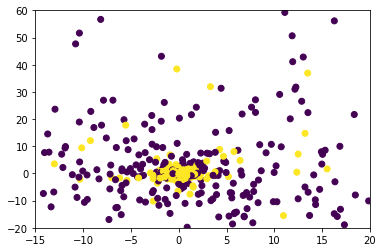

In [51]:
y_pred = lr.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

# Get the min and max on the x-axis for plotting lines later
minX = pca[:, 0].min()
maxX = pca[:, 1].max()

# Plot the solution.
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.xlim(-15,20)
plt.ylim(-20,60)
plt.show()

In [52]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=(0,1))
print(confusion)

[[ 62 119]
 [ 61 116]]


Function for a presentable confusion matrix

In [54]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Plotting a more presentable confusion matrix

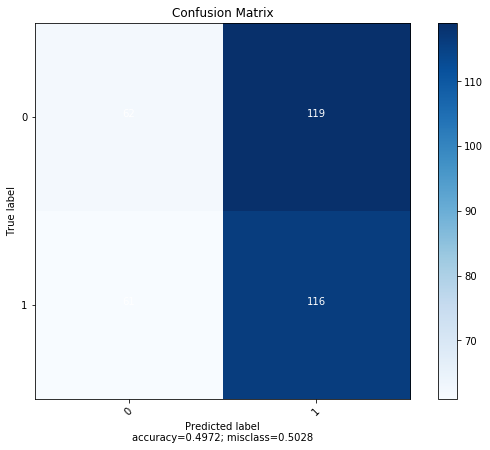

In [55]:
plot_confusion_matrix(cm=confusion, target_names = (1,0), title = 'Confusion Matrix',normalize=False)

Run a report on the Precision, Recall, and F1-score

In [56]:
report = classification_report(y_test, predictions, target_names=('0','1'))
print(report)

              precision    recall  f1-score   support

           0       0.50      0.34      0.41       181
           1       0.49      0.66      0.56       177

    accuracy                           0.50       358
   macro avg       0.50      0.50      0.49       358
weighted avg       0.50      0.50      0.48       358



Run five folds cross-validation with Logistic Regression algorithm.

In [60]:
start = time.time()
#clf = LogisticRegression(solver='lbfgs')
clf = LogisticRegression()
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

Time elapsed: 30.38 seconds.
Accuracy scores for the five folds:  [0.48611111 0.54166667 0.51748252 0.53846154 0.48951049 0.53846154
 0.52447552 0.52447552 0.47552448 0.6013986 ]
Mean cross-validation score: 0.524


C:\Users\Low\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Run KNN classifier with 1 nearest neighbors

In [61]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=1)

# Fit model
neighbors.fit(X_train,y_train)
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

C:\Users\Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Time elapsed: 19.62 seconds.
accuracy score: 0.8687150837988827


Run KNN classifier with 5 nearest neighbors

In [62]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=5)

# Fit model
neighbors.fit(X_train,y_train)
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

C:\Users\Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Time elapsed: 19.87 seconds.
accuracy score: 0.7569832402234636


Run KNN classifier with 10 nearest neighbors

In [63]:
start = time.time()
neighbors = KNeighborsClassifier(n_neighbors=10)

# Fit model
neighbors.fit(X_train,y_train)
y_pred = neighbors.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print('accuracy score: %s' % neighbors.score(X_test, y_test))

C:\Users\Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Time elapsed: 19.68 seconds.
accuracy score: 0.6815642458100558


Running Random Forest Classifer with n_estimators=5

In [64]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=5, n_jobs=-1)

score = cross_val_score(rfc, X, y, cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

[0.84357542 0.87709497 0.8603352  0.82681564 0.84916201 0.83798883
 0.82681564 0.89385475 0.83240223 0.82681564]

Cross-validation time elapsed: 13.02 seconds.
Average cross-validation score: 0.8475


Running Random Forest Classifer with n_estimators=10

In [66]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)

score = cross_val_score(rfc, X, y, cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

[0.8603352  0.9273743  0.8547486  0.87709497 0.84916201 0.83798883
 0.89385475 0.84357542 0.8603352  0.8603352 ]

Cross-validation time elapsed: 11.54 seconds.
Average cross-validation score: 0.8665


Running Random Forest Classifer with n_estimators=20

In [67]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=20, n_jobs=-1)

score = cross_val_score(rfc, X, y, cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

[0.91620112 0.91620112 0.9273743  0.89385475 0.89385475 0.86592179
 0.88268156 0.87709497 0.88268156 0.89385475]

Cross-validation time elapsed: 14.6 seconds.
Average cross-validation score: 0.895


Running Random Forest Classifer with n_estimators=40

In [68]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=40, n_jobs=-1)

score = cross_val_score(rfc, X, y, cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

[0.88826816 0.91061453 0.93854749 0.92178771 0.92178771 0.87709497
 0.90502793 0.90502793 0.86592179 0.90502793]

Cross-validation time elapsed: 21.65 seconds.
Average cross-validation score: 0.9039


Running Random Forest Classifier with n_estimators=10 and 100 cross-validations

In [69]:
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)

score = cross_val_score(rfc, X, y, cv=100)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),4)}')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed

[1.         0.88888889 0.83333333 0.77777778 0.72222222 0.94444444
 0.83333333 0.88888889 0.94444444 0.83333333 0.88888889 1.
 0.83333333 0.88888889 0.83333333 1.         1.         0.77777778
 0.83333333 0.88888889 0.94444444 0.94444444 1.         0.88888889
 1.         0.83333333 0.88888889 0.83333333 0.88888889 0.88888889
 0.83333333 0.72222222 0.77777778 0.83333333 0.83333333 0.94444444
 1.         0.77777778 0.94444444 0.94444444 0.94444444 0.66666667
 0.83333333 0.61111111 0.88888889 0.88888889 0.77777778 1.
 0.83333333 0.77777778 0.88888889 0.94444444 0.72222222 0.88888889
 0.88888889 0.94444444 0.77777778 0.83333333 0.88888889 0.83333333
 0.94444444 0.88888889 0.83333333 0.83333333 0.83333333 0.88888889
 0.88888889 0.94444444 0.88888889 0.88888889 0.83333333 0.83333333
 0.94444444 0.77777778 0.88888889 0.83333333 0.94444444 0.94444444
 0.94444444 0.72222222 0.88888889 0.88888889 0.88888889 0.88888889
 0.72222222 0.83333333 0.94444444 1.         0.83333333 0.88888889
 0.82352941

C:\Users\Low\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


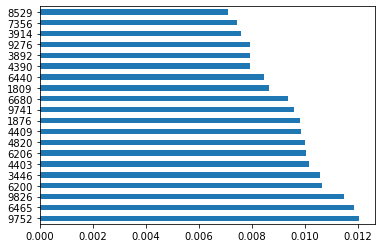

In [70]:
rfc.fit(X, y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [71]:
svc = SVC()
svc.fit(X,y)
svc.score(X, y)

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7564245810055866

In [73]:
start = time.time()

score = cross_val_score(svc, X, y, cv=10)

print(f'{score}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

print(f'Average cross-validation score: {round(score.mean(),2)}')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Low\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.73184358 0.72067039 0.70949721 0.78212291 0.78212291 0.7877095
 0.74860335 0.73184358 0.74860335 0.72625698]

Cross-validation time elapsed: 423.41 seconds.
Average cross-validation score: 0.75


Using Gradient Boosting Classifier

In [74]:
start = time.time()

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 1853.45 seconds.


Display a presentable confusion matrix of the results of Gradient Boosting Classifier

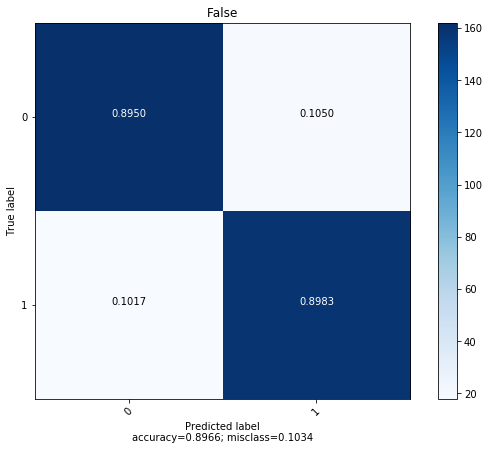

In [75]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

In [76]:
clf.score(X_test, y_test)

0.8966480446927374

Using Gradient Boosting Classifier with n_estimators = 600

In [77]:
start = time.time()

params = {'n_estimators': 600,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test), 4)}.')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 2296.09 seconds.
Accuracy score: 0.8966.


Using Gradient Boosting Classifier with n_estimator = 700

In [78]:
start = time.time()

params = {'n_estimators': 700,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test), 4)}.')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 2597.23 seconds.
Accuracy score: 0.8966.


Using Gradient Boosting Classifier with max_depth = 3

In [79]:
start = time.time()

params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test), 4)}.')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 2729.73 seconds.
Accuracy score: 0.9162.


Using Gradient Boosting Classifier with max_depth = 4

In [80]:
start = time.time()

params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test), 4)}.')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 2117.29 seconds.
Accuracy score: 0.9134.


In [81]:
start = time.time()

params = {'n_estimators': 800,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print(f'Time elapsed: {round(time.time() - start, 2)} seconds.')
print(f'Accuracy score: {round(clf.score(X_test, y_test), 4)}.')

C:\Users\Low\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time elapsed: 1659.81 seconds.
Accuracy score: 0.9022.


In [89]:
clf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,

In [91]:
y_test

,You
93,1
563,1
624,1
914,1
633,0
...,...
846,1
1601,0
1646,1
645,1
